In [1]:
import parse
from glob import glob
from datetime import datetime
import pandas as pd

In [2]:
filepaths = glob('./SatelliteData/satellite*.csv')
dfs  = {} # Dictionary to hold dataframes
for path in filepaths:
    sat = path[25:-4] # pull out the HWID
    dfs[sat] = parse.readFile(path)

In [3]:
for sat in sorted(dfs.keys()):
    parse.plotTime(dfs[sat], sat)

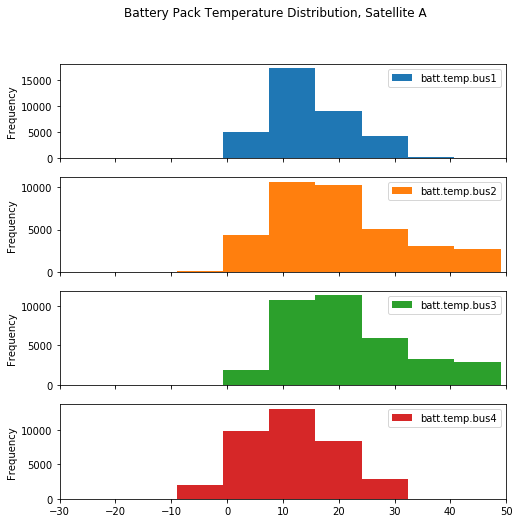

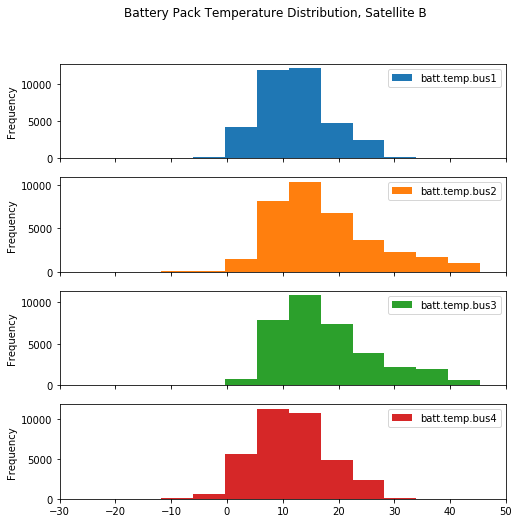

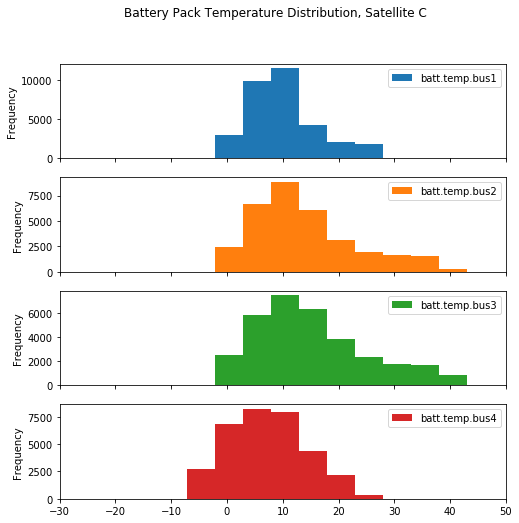

In [4]:
for sat in sorted(dfs.keys()):
    parse.plotDist(dfs[sat], sat)

In [5]:
activeA = dfs['A'][dfs['A']['timestamp'] >= datetime.fromisoformat('2016-07-20T23:09:46')]
activeB = dfs['B'][dfs['B']['timestamp'] >= datetime.fromisoformat('2016-07-21T02:34:52')]
inactiveA = dfs['A'][dfs['A']['timestamp'] < datetime.fromisoformat('2016-07-20T23:09:46')]
inactiveB = dfs['B'][dfs['B']['timestamp'] < datetime.fromisoformat('2016-07-21T02:34:52')]

In [6]:
active = pd.concat([activeA, activeB], keys=['A', 'B'])
inactive = pd.concat([dfs['C'], inactiveA, inactiveB], keys=['C', 'A', 'B'])

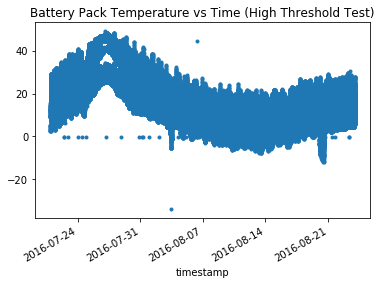

In [7]:
parse.plotReduce(active,'High Threshold Test')

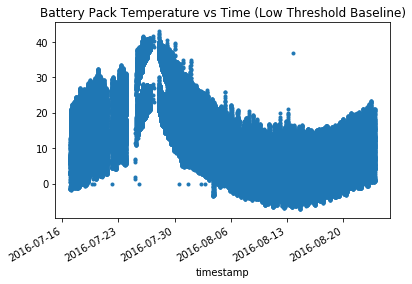

In [8]:
parse.plotReduce(inactive,'Low Threshold Baseline')